Binary Classification For Predicting Breast Cancer

In [1]:
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier #used for creating decision tree
from sklearn.tree import plot_tree 
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn import tree  
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score

data = pd.read_csv ("breast-cancer.csv")
dframe = pd.DataFrame(data) 
labelEncoder = LabelEncoder()
labelEncoder.fit(data["diagnosis"])
data["diagnosis"] = labelEncoder.transform(data["diagnosis"])
dframe.drop('id',axis=1,inplace=True)
display(dframe)
print(dframe.duplicated().to_string())


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

C:\Users\farah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

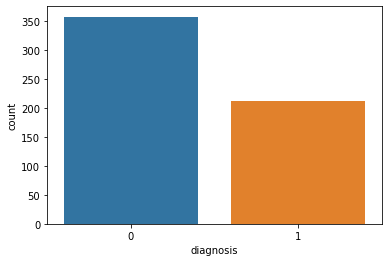

In [2]:
dframe['diagnosis'].value_counts()
sns.countplot(dframe['diagnosis'], label = 'count of B or M')

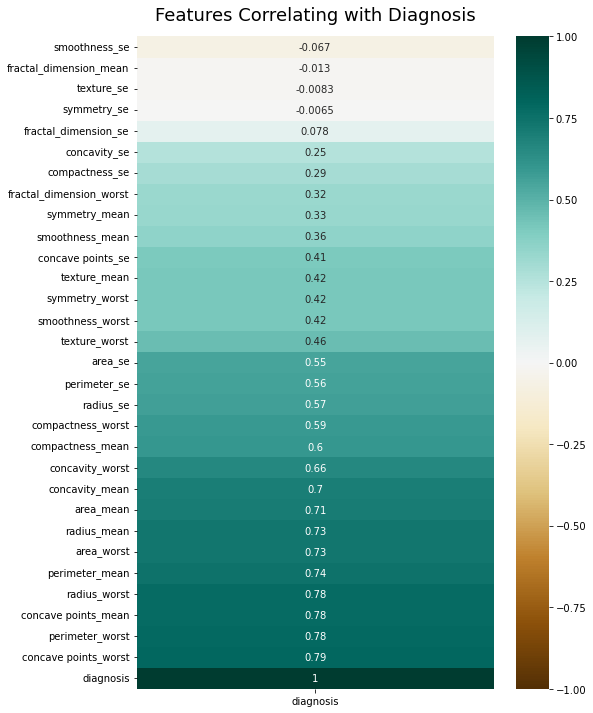

In [3]:
dframe.corr()[['diagnosis']].sort_values(by='diagnosis')
pl.figure(figsize=(8, 12))
heatmap = sns.heatmap(dframe.corr()[['diagnosis']].sort_values(by='diagnosis'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Diagnosis', fontdict={'fontsize':18}, pad=16);
    

In [4]:
#Splitting dataset into 80% training and 20% testing
dframe.drop(['smoothness_se','fractal_dimension_mean','texture_se','symmetry_se','fractal_dimension_se'],axis=1,inplace=True)
X=dframe.iloc[:,1:]
y=dframe.iloc[:,0:1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [5]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [6]:
y_pred=dt.predict(X_test)


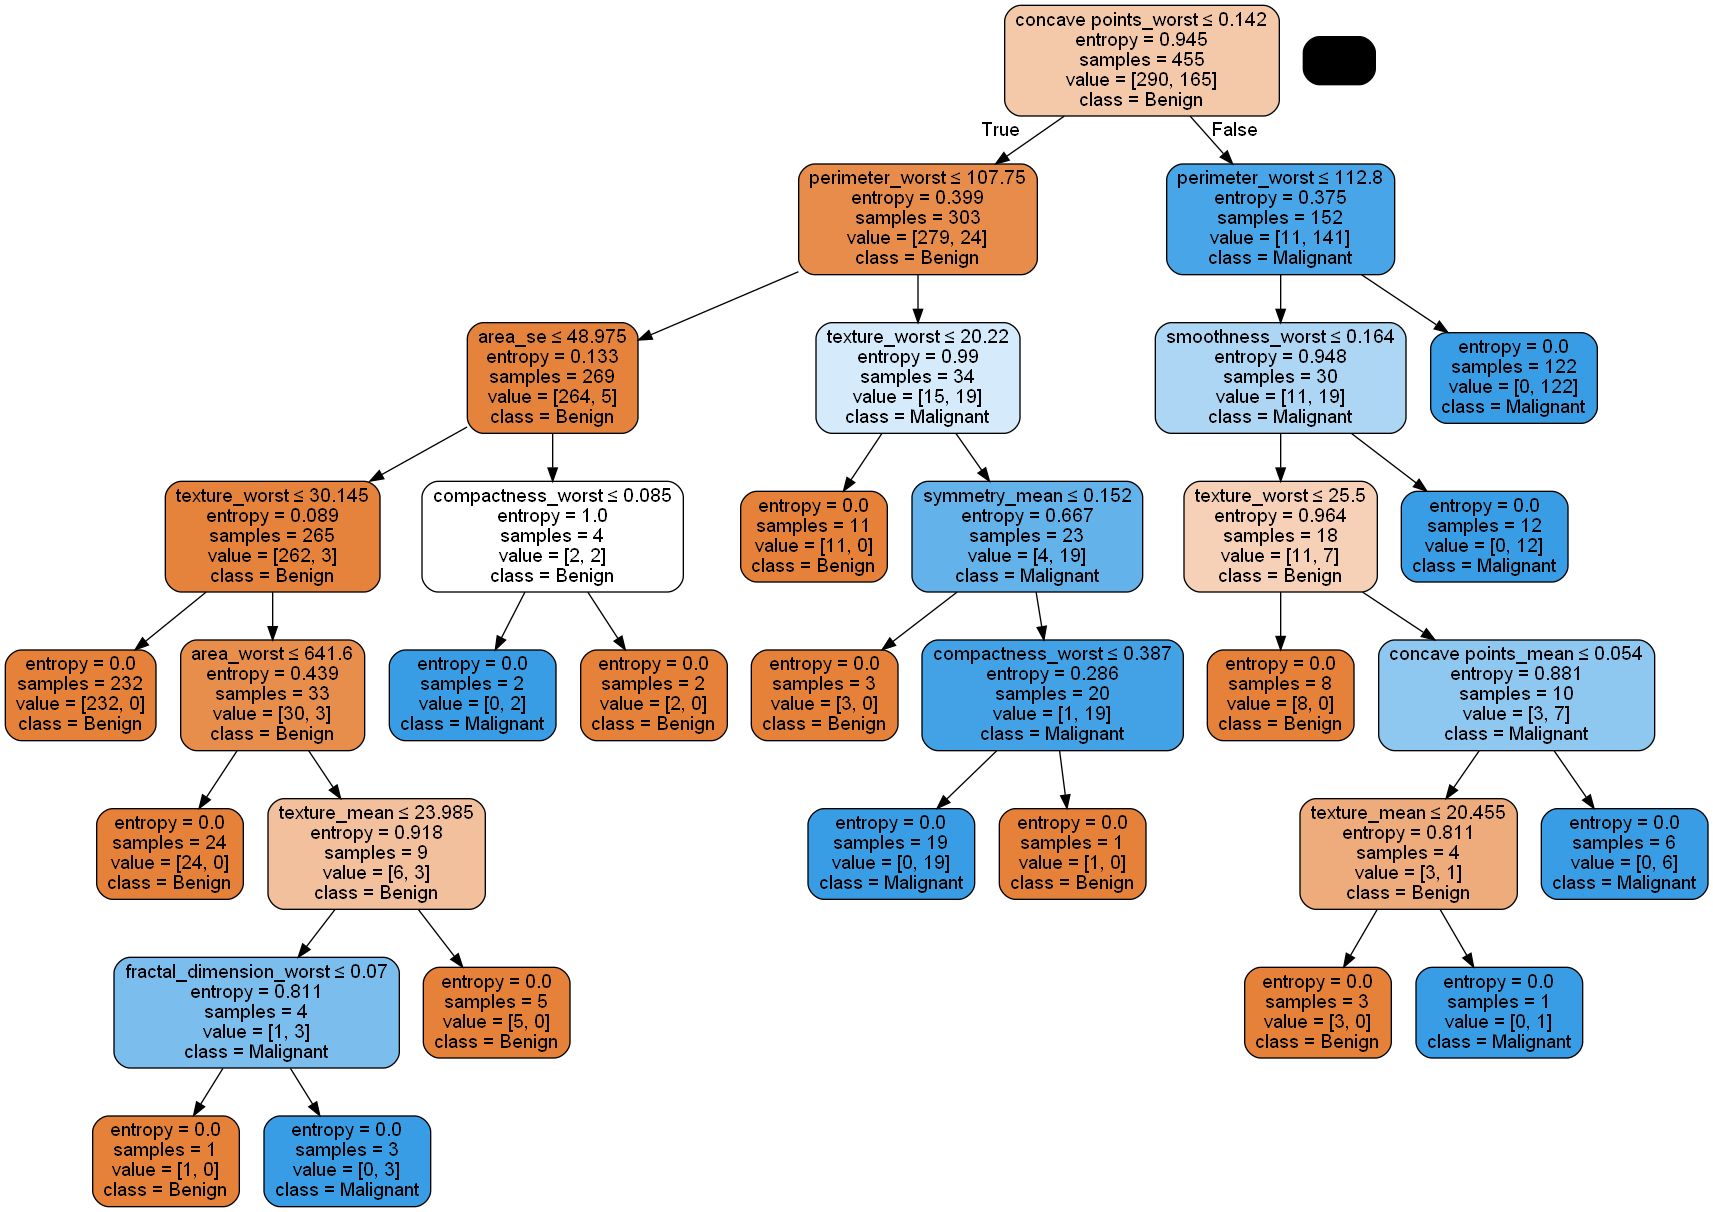

In [7]:
Names=list(X.columns.values)
dot_data = tree.export_graphviz(dt, out_file=None, filled=True, rounded=True,special_characters=True,feature_names=Names,class_names=['Benign','Malignant'])  
                                
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [8]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

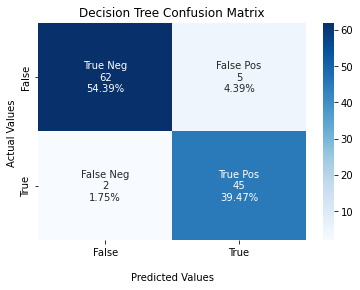

In [9]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Decision Tree Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
pl.show()

In [10]:
tree_accuracy=accuracy_score(y_test,y_pred)
tree_precision=precision_score(y_test, y_pred)
tree_recall=recall_score(y_test, y_pred)
tree_error=(1-accuracy_score(y_test,y_pred))
tree_spec=recall_score(y_test, y_pred, pos_label=0)
print("Acuracy score: ",tree_accuracy)
print("Precision score: ",tree_precision) #not very useful
print("Recall Score: ",tree_recall) 
print("Error Rate: ",tree_error)
print('Specificity : ',tree_spec)


Acuracy score:  0.9385964912280702
Precision score:  0.9
Recall Score:  0.9574468085106383
Error Rate:  0.06140350877192979
Specificity :  0.9253731343283582


In [11]:
#Recall, sensitivity or true positive rate (TPR) gives us a measure for how many of the real “true” values we detected. 
#When we want to keep the false positives to a minimum, we want to increase the precision of our model, and when we want to reduce false negatives, we want to increase the recall.

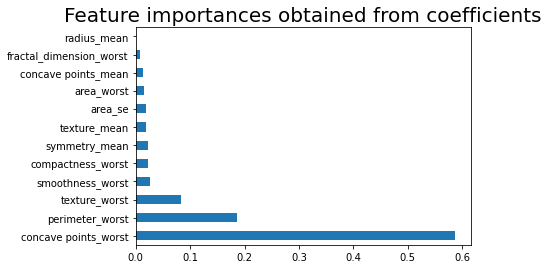

In [12]:
pl.title('Feature importances obtained from coefficients', size=20)
feat_importances = pd.Series(dt.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
pl.show()

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state= 0, test_size=0.2)
#take nearest odd number for accuracy
import math
math.sqrt(len(y_test))


10.677078252031311

In [14]:
knn = KNeighborsClassifier(n_neighbors=9)
#training model
knn.fit(x_train, y_train)


C:\Users\farah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9)

In [15]:
#testing accuracy compared to training
knn_accuracy = knn.score(x_test, y_test)

In [16]:
#confusion matrix
from sklearn.metrics import confusion_matrix
y_pred= knn.predict(x_test)
output= confusion_matrix(y_test, y_pred)
output

array([[66,  1],
       [ 3, 44]], dtype=int64)

Text(33.0, 0.5, 'Truth')

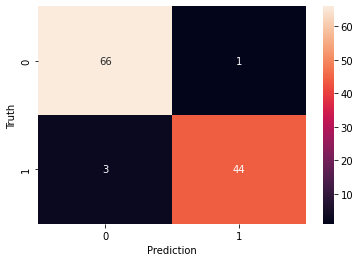

In [17]:
sns.heatmap(output, annot=True)
pl.xlabel('Prediction')
pl.ylabel('Truth')

In [18]:
knn_precision=precision_score(y_test, y_pred)
knn_recall=recall_score(y_test, y_pred)
knn_error=(1-accuracy_score(y_test,y_pred))
knn_spec=recall_score(y_test, y_pred, pos_label=0)
print("Accuracy score: ",knn_accuracy)
print("Precision score: ",knn_precision) #not very useful
print("Recall Score: ",knn_recall) 
print("Error Rate: ",knn_error)
print('Specificity : ',knn_spec)

Accuracy score:  0.9649122807017544
Precision score:  0.9777777777777777
Recall Score:  0.9361702127659575
Error Rate:  0.03508771929824561
Specificity :  0.9850746268656716


In [19]:
#prediction with labels
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state= 0, test_size=0.2)
gnb= GaussianNB()
gnb.fit(x_train, y_train)
pred= gnb.predict(x_test)
print(pred)

C:\Users\farah\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0]


In [21]:
bayesian_accuracy=accuracy_score(y_test, pred)
bayesian_precision=precision_score(y_test, y_pred)
bayesian_recall=recall_score(y_test, y_pred)
bayesian_error=(1-accuracy_score(y_test,y_pred))
bayesian_spec=recall_score(y_test, y_pred, pos_label=0)
print("Acuracy score: ",bayesian_accuracy)
print("Precision score: ",bayesian_precision) #not very useful
print("Recall Score: ",bayesian_recall) 
print("Error Rate: ",bayesian_error)
print('Specificity : ',bayesian_spec)

Acuracy score:  0.9298245614035088
Precision score:  0.9777777777777777
Recall Score:  0.9361702127659575
Error Rate:  0.03508771929824561
Specificity :  0.9850746268656716


In [22]:
out= confusion_matrix(y_test, pred)
out

array([[63,  4],
       [ 4, 43]], dtype=int64)

Text(33.0, 0.5, 'Truth')

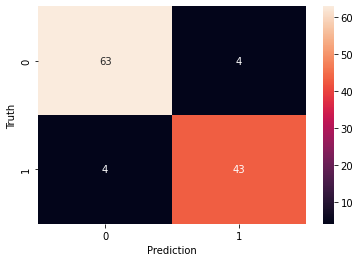

In [23]:
sns.heatmap(out, annot=True)
pl.xlabel('Prediction')
pl.ylabel('Truth')

In [24]:
print("Naive Bayes score: ", gnb.score(x_test, y_test))

Naive Bayes score:  0.9298245614035088


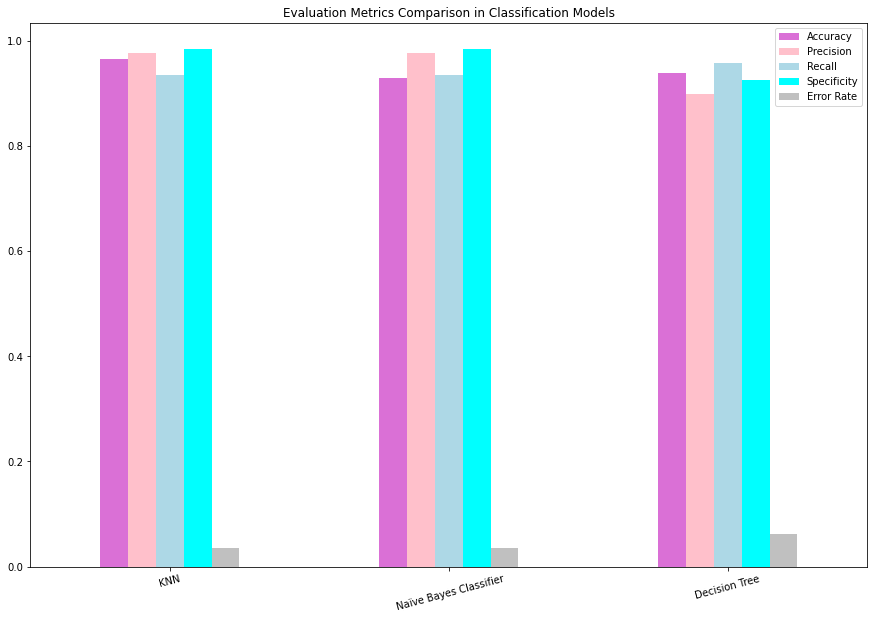

In [31]:
data={"Accuracy":[knn_accuracy,bayesian_accuracy,tree_accuracy],
     "Precision":[knn_precision,bayesian_precision,tree_precision],
     "Recall":[knn_recall,bayesian_recall,tree_recall],
     "Specificity":[knn_spec,bayesian_spec,tree_spec],
     "Error Rate":[knn_error,bayesian_error,tree_error]};
index=["KNN"," Naïve Bayes Classifier","Decision Tree"];
dataframe=pd.DataFrame(data=data,index=index);
dataframe.plot.bar(rot=15,title="Evaluation Metrics Comparison in Classification Models",color=['orchid','pink','lightblue','aqua','silver'])
pl.rcParams["figure.figsize"] = (15,10)
pl.show(block=True);